In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

from mayan_vaults import FIGURES

from mayan_vaults.vaults import create_vault
from mayan_vaults.optimization import solve_thrust_minmax_vault
from mayan_vaults.plotting import plot_thrust_minmax_vault

In [57]:
def pretty_matplotlib():
    
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size=24)
    plt.rc('axes', linewidth=1.5, labelsize=34)
    plt.rc('xtick', labelsize=24, direction="in")
    plt.rc('ytick', labelsize=24, direction="in")
    
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

    # tick settings
    plt.rc('xtick.major', size=10, pad=4)
    plt.rc('xtick.minor', size=5, pad=4)
    plt.rc('ytick.major', size=10)
    plt.rc('ytick.minor', size=5)

    
def create_figure(figsize, dpi):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    return fig


def plot_xy(x, y, label, lw=2.0, alpha=1.0, linestyle=None, marker="o", marker_kwargs=None, color=None):
    marker_kwargs = marker_kwargs or {}
    return plt.plot(x, y, label=label, lw=lw, alpha=alpha, ls=linestyle, marker=marker, color=color, **marker_kwargs)
    
    
def save_figure(filename, extension="pdf", box_inches="tight", pad_inches=0.05, sleeptime=1.0):
    path = f"{filename}.{extension}"
    plt.savefig(path, bbox_inches='tight', pad_inches=pad_inches)
    print(f"Saved image to {path}")
    
    
def show_figure():
    plt.show()

    
def decorate_figure(xlabel, ylabel, xticks, yticks, xticks_labels=None, yticks_labels=None, ylabelpad=None, xscale="linear", yscale="linear", linthresh=0.1, legend=True, legend_loc="best", legend_fontsize="small", grid=True, grid_kwargs={}, tight=True):
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, labelpad=ylabelpad)
    
    
    if xscale == "symlog":
        plt.xscale(xscale, linthresh=linthresh)
    else:
        plt.xscale(xscale)

    if yscale == "symlog":
        plt.yscale(yscale, linthresh=linthresh)
    else:
        plt.yscale(yscale)
    
    # Enable minor ticks on the y-axis
    plt.xticks(xticks, labels=xticks_labels)
    plt.yticks(yticks, labels=yticks_labels)

    # plt.minorticks_on()

    if grid:
        plt.grid(**grid_kwargs)
    
    if legend:
        plt.legend(fontsize=legend_fontsize, loc=legend_loc)
        
    if tight:
        plt.tight_layout()
        

def normalized_color(color):
    return tuple([c / 255.0 for c in (color)])


def run_minmax_experiment(config_vault, config_optimization, config_plotting):
    """
    Run a thrust minimization and maximization experiment.
    """    
    vault = create_vault(**config_vault)
    networks, results = solve_thrust_minmax_vault(vault, **config_optimization)
    plot_thrust_minmax_vault(vault, networks, **config_plotting)
    
    return results


def sweep_experiments(ratios, sweep_fn, config_vault, config_optimization, config_plotting, sweep_data=None):
    """
    Sweep experiments.
    """
    if sweep_data is None:
        sweep_data = {}

    config_vault_copy = {k: v for k, v in config_vault.items()}

    for ratio in ratios:
        print(f"\n ############### Sweeping ratio {ratio} ###############")
        sweep_fn(ratio, config_vault_copy)        
        results = run_minmax_experiment(config_vault_copy, config_optimization, config_plotting)
        sweep_data[ratio] = results

    return sweep_data


def sweep_wall_height_fn(ratio, config_vault): 
    """
    Sweep wall height function.
    """
    config_vault["wall_height"] = ratio * config_vault["height"]
    print(f"\nExperiment with ratio {ratio}  and wall height: {config_vault['wall_height']}")


def sweep_wall_width_fn(ratio, config_vault): 
    """
    Sweep wall width function.
    """
    # config_vault["wall_width"] = ratio * config_vault["width"] * 0.5
    config_vault["wall_width"] = (1.0 - ratio) * config_vault["width"] * 0.5
    print(f"\nExperiment with ratio {ratio}  and wall width: {config_vault['wall_width']}")



 ############### Sweeping ratio 0.05 ###############

Experiment with ratio 0.05  and wall width: 3.8

***** Solving for min solution *****

SW (Vertical load sum): 38.80
Thrust at support: 0.19
Ratio thrust / SW [%]: 0.5

***** Solving for max solution *****

SW (Vertical load sum): 38.80
Thrust at support: 6.33
Ratio thrust / SW [%]: 16.3

***** Plotting *****


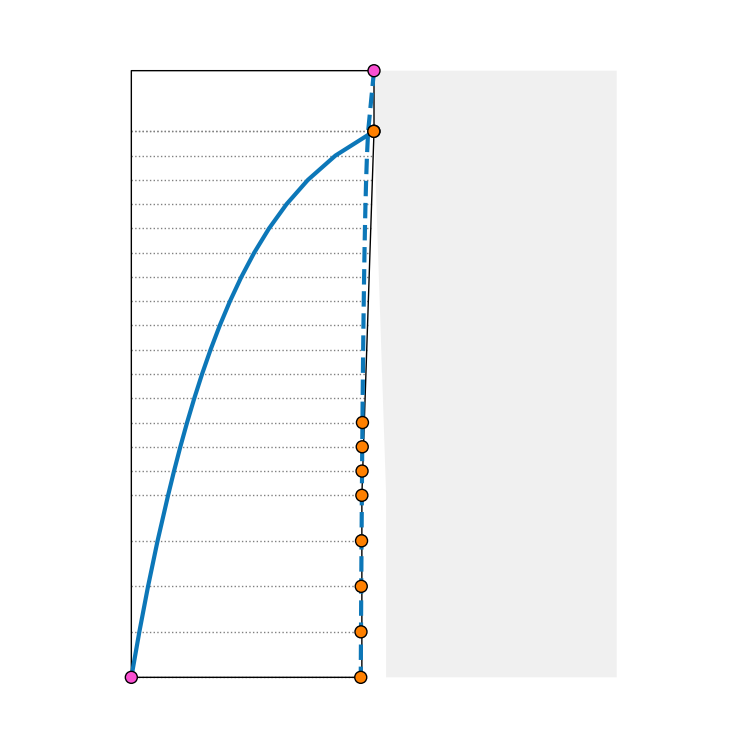


 ############### Sweeping ratio 0.1 ###############

Experiment with ratio 0.1  and wall width: 3.6

***** Solving for min solution *****

SW (Vertical load sum): 37.60
Thrust at support: 0.39
Ratio thrust / SW [%]: 1.0

***** Solving for max solution *****

SW (Vertical load sum): 37.60
Thrust at support: 6.28
Ratio thrust / SW [%]: 16.7

***** Plotting *****


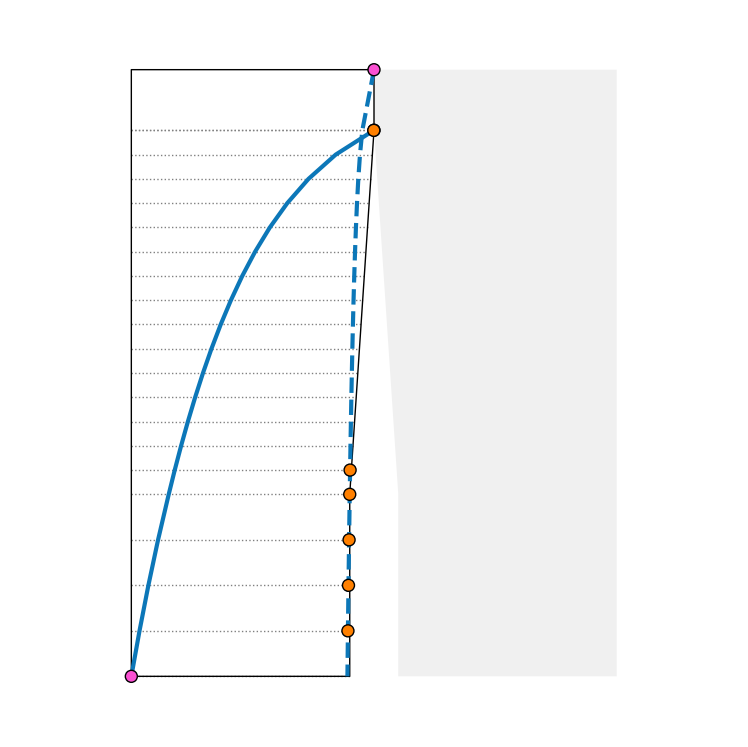


 ############### Sweeping ratio 0.2 ###############

Experiment with ratio 0.2  and wall width: 3.2

***** Solving for min solution *****

SW (Vertical load sum): 35.20
Thrust at support: 0.77
Ratio thrust / SW [%]: 2.2

***** Solving for max solution *****

SW (Vertical load sum): 35.20
Thrust at support: 6.16
Ratio thrust / SW [%]: 17.5

***** Plotting *****


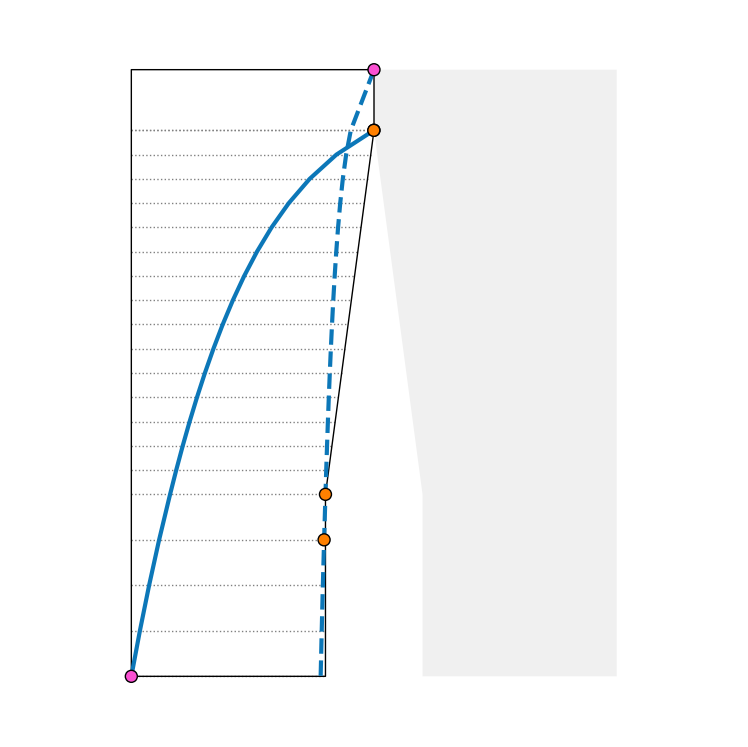


 ############### Sweeping ratio 0.3 ###############

Experiment with ratio 0.3  and wall width: 2.8

***** Solving for min solution *****

SW (Vertical load sum): 32.80
Thrust at support: 1.14
Ratio thrust / SW [%]: 3.5

***** Solving for max solution *****

SW (Vertical load sum): 32.80
Thrust at support: 6.04
Ratio thrust / SW [%]: 18.4

***** Plotting *****


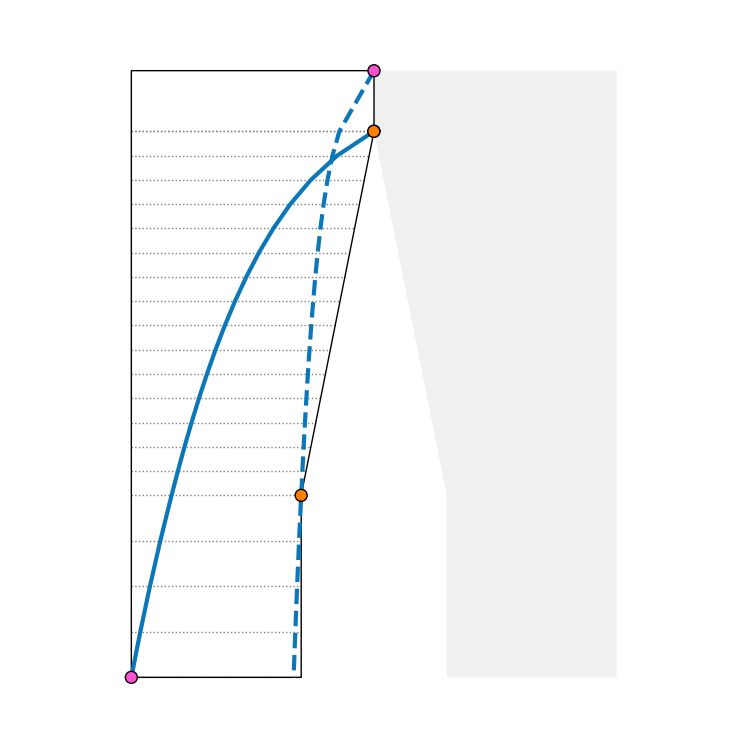


 ############### Sweeping ratio 0.4 ###############

Experiment with ratio 0.4  and wall width: 2.4

***** Solving for min solution *****

SW (Vertical load sum): 30.40
Thrust at support: 1.51
Ratio thrust / SW [%]: 5.0

***** Solving for max solution *****

SW (Vertical load sum): 30.40
Thrust at support: 5.92
Ratio thrust / SW [%]: 19.5

***** Plotting *****


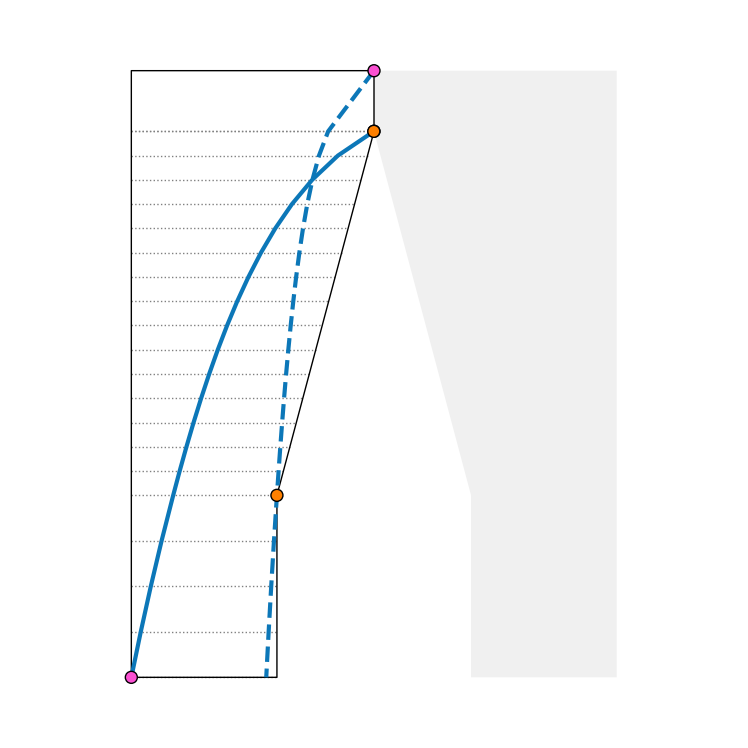


 ############### Sweeping ratio 0.5 ###############

Experiment with ratio 0.5  and wall width: 2.0

***** Solving for min solution *****

SW (Vertical load sum): 28.00
Thrust at support: 1.88
Ratio thrust / SW [%]: 6.7

***** Solving for max solution *****

SW (Vertical load sum): 28.00
Thrust at support: 5.79
Ratio thrust / SW [%]: 20.7

***** Plotting *****


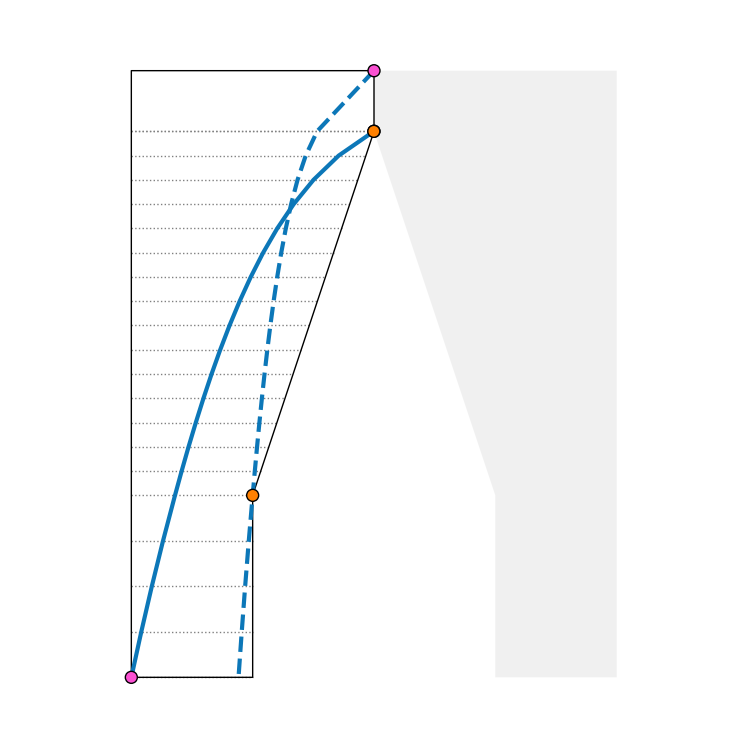


 ############### Sweeping ratio 0.6 ###############

Experiment with ratio 0.6  and wall width: 1.6

***** Solving for min solution *****

SW (Vertical load sum): 25.60
Thrust at support: 2.24
Ratio thrust / SW [%]: 8.7

***** Solving for max solution *****

SW (Vertical load sum): 25.60
Thrust at support: 5.65
Ratio thrust / SW [%]: 22.1

***** Plotting *****


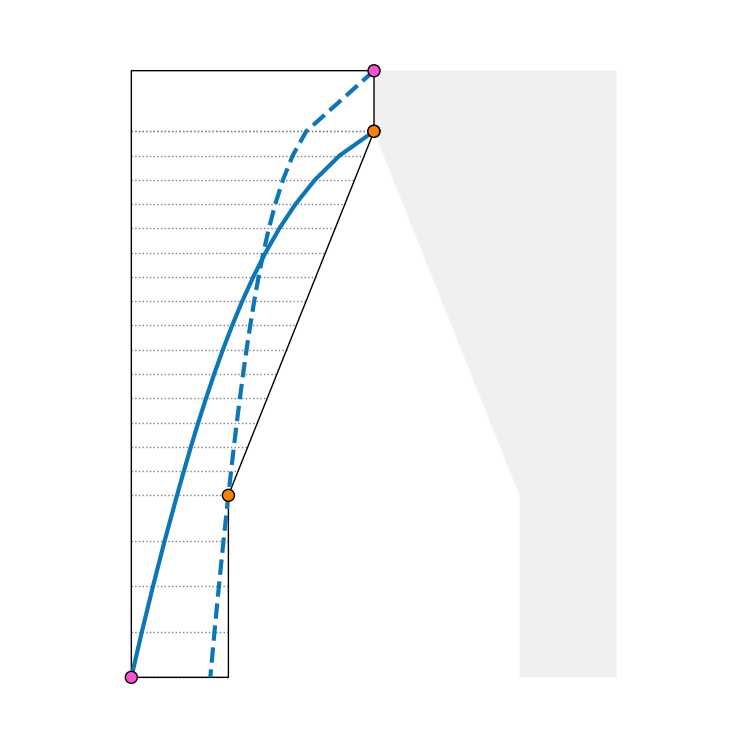


 ############### Sweeping ratio 0.7 ###############

Experiment with ratio 0.7  and wall width: 1.2000000000000002

***** Solving for min solution *****

SW (Vertical load sum): 23.20
Thrust at support: 2.59
Ratio thrust / SW [%]: 11.2

***** Solving for max solution *****

SW (Vertical load sum): 23.20
Thrust at support: 5.51
Ratio thrust / SW [%]: 23.7

***** Plotting *****


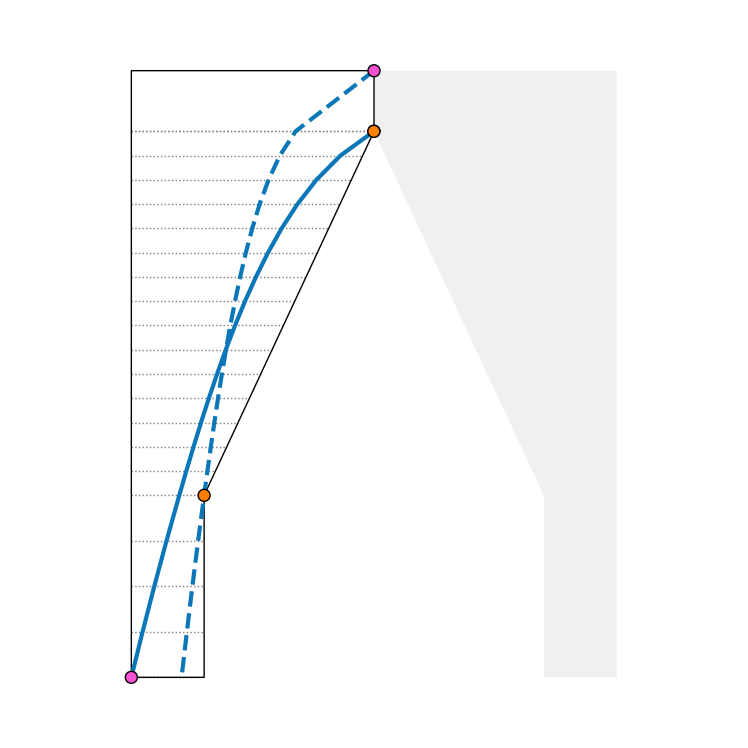


 ############### Sweeping ratio 0.8 ###############

Experiment with ratio 0.8  and wall width: 0.7999999999999998

***** Solving for min solution *****

SW (Vertical load sum): 20.80
Thrust at support: 2.93
Ratio thrust / SW [%]: 14.1

***** Solving for max solution *****

SW (Vertical load sum): 20.80
Thrust at support: 5.14
Ratio thrust / SW [%]: 24.7

***** Plotting *****


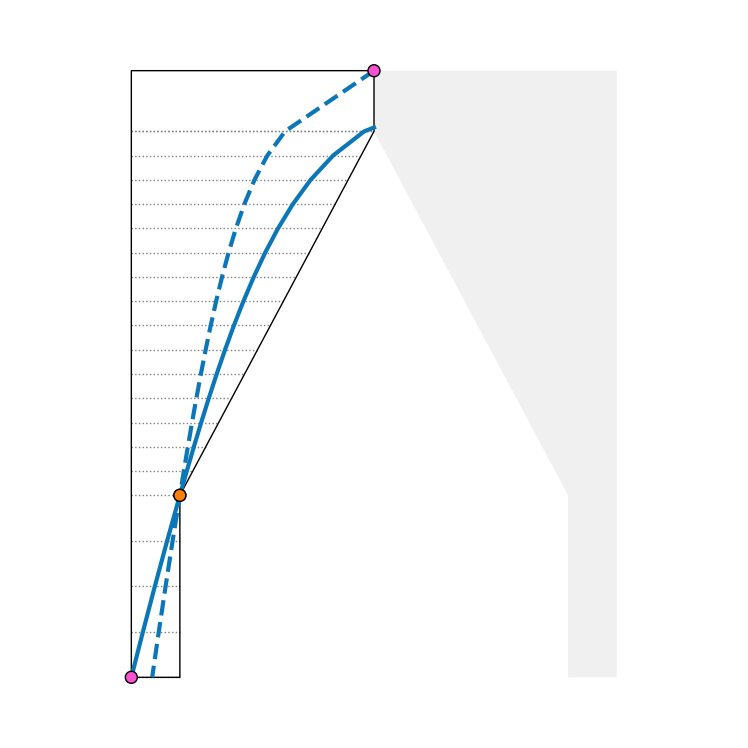


 ############### Sweeping ratio 0.87 ###############

Experiment with ratio 0.87  and wall width: 0.52

***** Solving for min solution *****



/Users/arpj/code/princeton/mayan_vaults/src/mayan_vaults/optimization.py:293: UserWarning: Optimization failed

  warn("Optimization failed\n")


 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 3.1677769916722225
       x: [-3.168e+00  9.999e+00]
     nit: 8
     jac: [-1.000e+00  0.000e+00]
    nfev: 24
    njev: 4
SW (Vertical load sum): 19.12
Thrust at support: 3.17
Ratio thrust / SW [%]: 16.6

***** Solving for max solution *****

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: -3.1677769916722527
       x: [-3.168e+00  9.999e+00]
     nit: 6
     jac: [ 1.000e+00  0.000e+00]
    nfev: 2
    njev: 2
SW (Vertical load sum): 19.12
Thrust at support: 3.17
Ratio thrust / SW [%]: 16.6

***** Plotting *****


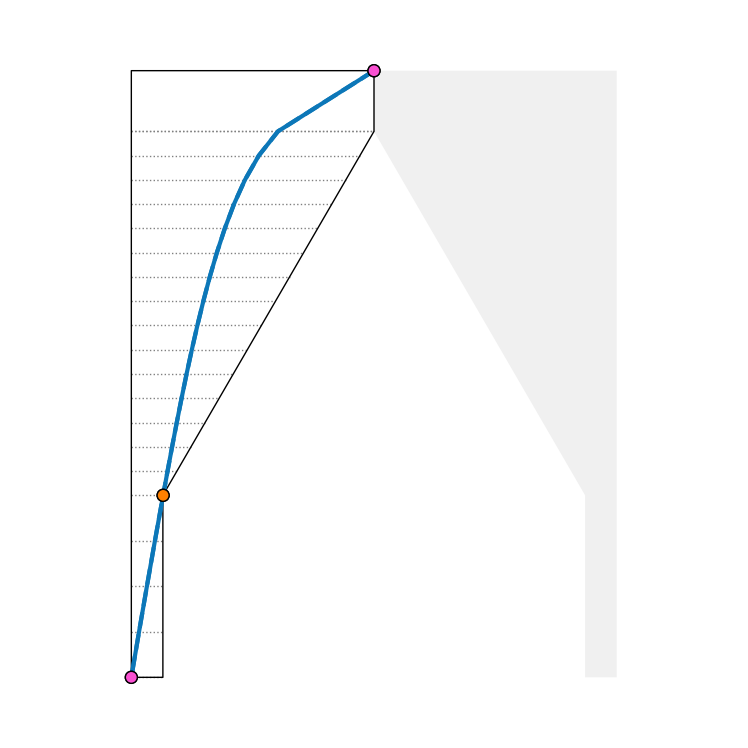

In [77]:
config_vault = {
    "height": 10.0,
    "width": 8.0,
    "wall_height": 7.0,
    "wall_width": 2.0,
    "lintel_height": 1.0,
    "num_blocks": 20,
    "slicing_method": 0,  # 0: block, 1: uniform height
    "block_density": 1.0
}

config_optimization = {
    "tol_bounds": 1.0e-3,  # origin node height tolerance on bounds for numerical stability (no zero length segments)
    "tol": 1.0e-6,  # tolerance for optimization
    "maxiter": 100  # maximum number of iterations
}

config_plotting = {
    "forcescale": 0.5,
    "tol_bounds": 1.0e-3,
    "plot_constraints": True,
    "plot_other_half": True,
    "plot_loads": False,
    "plot_thrusts": False,
    "save_plot": False,
    "show_plot": True
}

# wall height sweep, height = 10, width = 10, wall width = 2
# ratios = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.74]
# wall height sweep, height = 10, width = 8, wall width = 2
# ratios = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.825]
# sweep_name = "wall_height"

# wall width sweep, height = 10, width = 8, wall height = 5
ratios = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76]
# wall width sweep, height = 10, width = 8, wall height = 3
ratios = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.87]
sweep_name = "wall_width"


sweep_fns = {
    "wall_height": sweep_wall_height_fn,
    "wall_width": sweep_wall_width_fn
}

sweep_data = sweep_experiments(
    ratios, 
    sweep_fns[sweep_name], 
    config_vault, 
    config_optimization, 
    config_plotting
    )

Saved image to /Users/arpj/code/princeton/mayan_vaults/figures/plot_thrust_minmax_wall_width.pdf


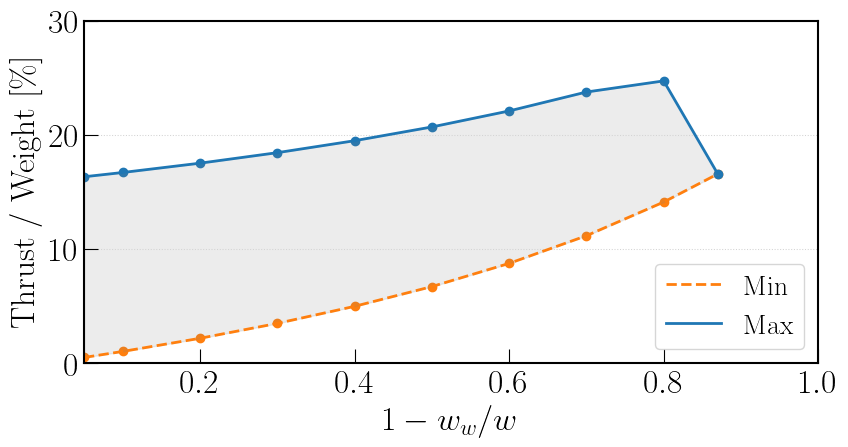

In [79]:
SAVE_FIG = True
FIGSIZE = (9, 5)  # (9, 6.5)
DPI = 100
FIG_EXTENSION = "pdf"

YLABEL = r"Thrust / Weight [\%]"

SOLUTION_NAMES = ["min", "max"]
LINESTYLES = {"min": "dashed", "max": "solid"}
LABELS = {"min": "Min", "max": "Max"}
COLORS = {"min": "tab:orange", "max": "tab:blue"}

XLABELS = {
    "wall_height": r"$h_{w}/h$",
    "wall_width": r"$1 - w_{w}/w$"
}

FILL_AREA = True
PLOT_DOTS = True
pretty_matplotlib()

fig = plt.figure(figsize=FIGSIZE, dpi=DPI)


# ylim = ylims[METRIC]
# ylabel = ylabels[METRIC]
# yticks = yticks_all[METRIC]
# yticks_labels = yticks_labels_all[METRIC]
# legend_loc = legend_locs[METRIC]

xs_all = []
ys_all = {}

for name in SOLUTION_NAMES:

    ratios = []
    values = []
    for ratio, experiment_data in sweep_data.items():
        ratios.append(ratio)

        thrust = experiment_data[name]["thrust"]
        sw = experiment_data[name]["sw"]
        value = 100.0 * thrust / sw
        values.append(value)
    
    xs = np.array(list(ratios))
    xs_all.extend(xs)

    ys = np.array(list(values))
    ys_all[name] = ys
    
    line = plt.plot(xs,
                    ys,
                    linewidth=2.0,
                    ls=LINESTYLES[name],
                    color=COLORS[name],                        
                    label=LABELS[name]
                    )
        
    
if PLOT_DOTS:
    plt.scatter(xs, ys_all["min"], color=COLORS["min"])
    plt.scatter(xs, ys_all["max"], color=COLORS["max"])

if FILL_AREA:    
    plt.fill_between(xs, ys_all["min"], ys_all["max"], color="gray", alpha=0.15)


ylim = [0.0, 30.0]
plt.ylim(*ylim)
plt.xlim(min(xs_all), 1.0)
xticks = None  # [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
yticks = None
yticks_labels = None
legend_loc = "upper right"

grid_kwargs = {'which': 'major',  # major
               'axis': 'y',
               'color': 'lightgray',
               'linestyle': 'dotted',
               'linewidth': 0.75}

decorate_figure(XLABELS[sweep_name],
                YLABEL,
                xticks=xticks,
                yticks=yticks,
                xticks_labels=None,
                yticks_labels=yticks_labels,
                ylabelpad=None,
                xscale="linear",
                yscale="linear",
                legend=True,
                legend_loc=legend_loc,  # legend_loc="lower right",
                legend_fontsize="small",  # medium, small, x-small, xx-small
                grid=True,
                grid_kwargs=grid_kwargs,
                tight=True)

if SAVE_FIG:
    fig_filename = f"plot_thrust_minmax_{sweep_name}"
    fig_filepath = os.path.join(FIGURES, fig_filename)
    save_figure(fig_filepath,
                extension=FIG_EXTENSION,
                box_inches="tight",
                pad_inches=0.05)

plt.show()
